In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [2]:
data = pd.read_csv('C:/Users/Lenovo/Desktop/Auto_formation/AI/GoMyCode/AI_TRACK_CHALLENGE/AI_TRACK_CHALLENGE/homicide-reports/database.csv',sep=',')
#data.head()
copyDATA = data.copy() #copy from the original dataset


c:\users\rihab\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data understanding

In [100]:
copyDATA.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [101]:
# data preparation
print(copyDATA.shape)
print(list(copyDATA.columns))


(638454, 24)
['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City', 'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved', 'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity', 'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count', 'Perpetrator Count', 'Record Source']


In [102]:
print(copyDATA.dtypes)

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object


In [103]:
#copyDATA = copyDATA.dropna()
#print(copyDATA.isnull().sum().sum())

In [104]:
copyDATA['City'].unique()

array(['Anchorage', 'Juneau', 'Nome', ..., 'Rooks', 'McCone', 'Antelope'],
      dtype=object)

In [105]:
copyDATA['Crime Type'].unique()

array(['Murder or Manslaughter', 'Manslaughter by Negligence'],
      dtype=object)

In [106]:
copyDATA['Victim Race'].unique()

array(['Native American/Alaska Native', 'White', 'Black', 'Unknown',
       'Asian/Pacific Islander'], dtype=object)

In [107]:
copyDATA['Victim Sex'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [108]:
copyDATA['Perpetrator Race'].unique()

array(['Native American/Alaska Native', 'White', 'Unknown', 'Black',
       'Asian/Pacific Islander'], dtype=object)

In [109]:
copyDATA['Perpetrator Ethnicity'].unique()

array(['Unknown', 'Not Hispanic', 'Hispanic'], dtype=object)

In [110]:
copyDATA['Weapon'].unique()

array(['Blunt Object', 'Strangulation', 'Unknown', 'Rifle', 'Knife',
       'Firearm', 'Shotgun', 'Fall', 'Handgun', 'Drowning', 'Suffocation',
       'Explosives', 'Fire', 'Drugs', 'Gun', 'Poison'], dtype=object)

In [111]:
copyDATA.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Record ID,638454.0,319227.500000,184305.938720,1.0,159614.25,319227.5,478840.75,638454.0
Year,638454.0,1995.801102,9.927693,1980.0,1987.00,1995.0,2004.00,2014.0
Incident,638454.0,22.967924,92.149821,0.0,1.00,2.0,10.00,999.0
Victim Age,638454.0,35.033512,41.628306,0.0,22.00,30.0,42.00,998.0
Victim Count,638454.0,0.123334,0.537733,0.0,0.00,0.0,0.00,10.0
Perpetrator Count,638454.0,0.185224,0.585496,0.0,0.00,0.0,0.00,10.0


In [112]:
print(copyDATA.isnull().sum().sum())

0


In [113]:
copyDATA.groupby('Victim Sex').mean()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
Victim Sex,,,,,,
Female,314428.450563,1995.528187,21.048212,36.253465,0.208964,0.106045
Male,320529.601380,1995.875542,23.523268,33.280089,0.098461,0.208312
Unknown,364470.281504,1998.177846,23.752033,737.814024,0.139228,0.126016


Female victims are older then male victims in average

an anomaly in the data is detected mean(unknown age)>>700

Female victims 0.09 > Male Victims 0.04

In [114]:
copyDATA.groupby('Perpetrator Sex').mean()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
Perpetrator Sex,,,,,,
Female,287831.656423,1994.139882,17.463644,34.675414,0.081198,0.162231
Male,319477.195507,1995.806788,22.129726,33.931048,0.138454,0.259465
Unknown,326710.187582,1996.212823,26.130880,37.438705,0.102345,0.035269


In [115]:
copyDATA.groupby('Crime Solved').mean()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
Crime Solved,,,,,,
No,326560.985979,1996.203934,25.797112,37.448434,0.101476,0.035284
Yes,316113.895449,1995.630071,21.766726,34.008200,0.132614,0.248884


the solved case happened in 1995 in average

# Data visualization

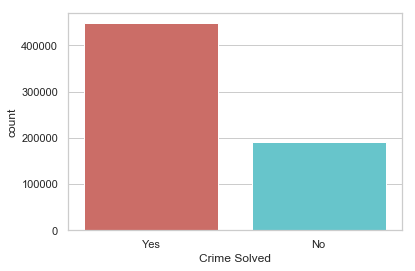

In [116]:
sns.countplot(x='Crime Solved',data=copyDATA,palette='hls')
plt.show()
#figure of solved and unsolved crimes

Text(0.5,1,'Number of total homecides in each state')

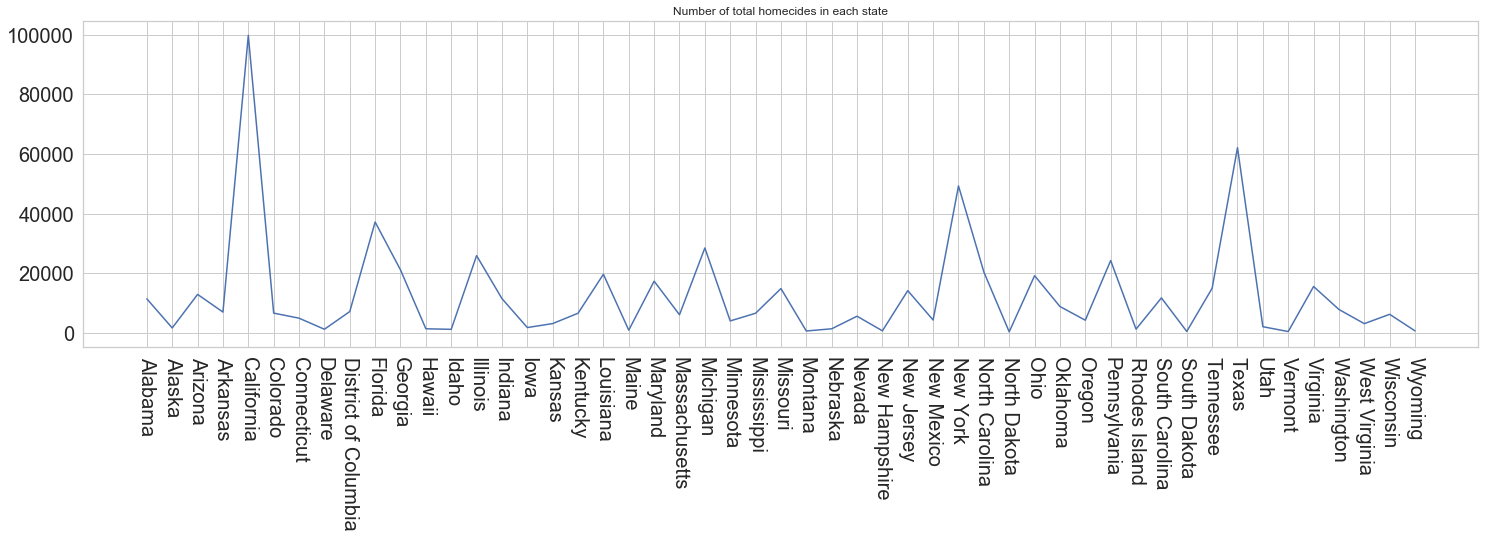

In [117]:

s_count=copyDATA[['State','Incident']].groupby(['State'],as_index=False).count()
plt.figure(figsize=(25, 6))
plt.xticks(rotation=-90)
plt.tick_params(labelsize=20)
plt.plot(s_count['State'],s_count['Incident'])
plt.title('Number of total homecides in each state')


this figure shows that in california,Texas,New York,Florida,Mchigan,ilinois,Pennsylvania..

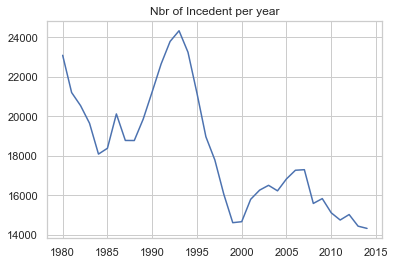

In [118]:
yi_count=copyDATA[['Year','Incident']].groupby(['Year'],as_index=False).count()
plt.title('Nbr of Incedent per year')
plt.plot(yi_count['Year'],yi_count['Incident'])

this figure shows that in general the number of homicides has decreased over the years 

the highest nbr is scored in 1980 and  between [1990,1995]

    Victim Count  Incident
0              0    586059
1              1     38750
2              2      8156
3              3      2847
4              4      1084
5              5       510
6              6       286
7              7       168
8              8       144
9              9       290
10            10       160


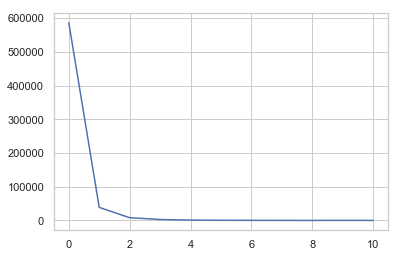

In [119]:
dd=copyDATA[['Incident','Victim Count']].groupby(['Victim Count'],as_index=False).count()
print(dd)
plt.plot(dd['Victim Count'],dd['Incident'])


In the majority of Accident there was not a victim

excatly more then 90% of accident had no victims

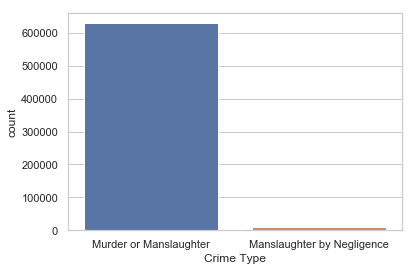

In [120]:
dd=copyDATA[copyDATA['Victim Count']==0]
sns.countplot(x='Crime Type',data=copyDATA)

this figure shows that even there weren't any victims these crimes are mostly considered as murder or Manslaughter

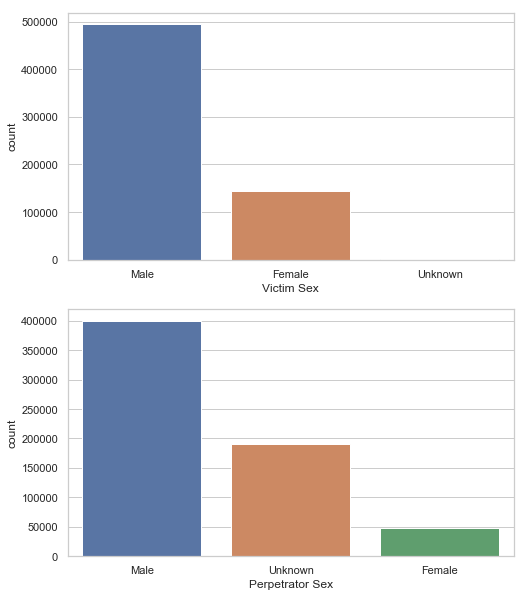

In [121]:
plt.figure(figsize=(8, 10))
plt.subplot(2,1,1)
sns.countplot(x='Victim Sex',data=copyDATA)
plt.subplot(2,1,2)
sns.countplot(x='Perpetrator Sex',data=copyDATA)
#plt.xticks(rotation=-45)
#plt.yticks(rotation=-15)


Both Victim and perpetrator are mostly men

77% men victims and 62% men Perpetrator

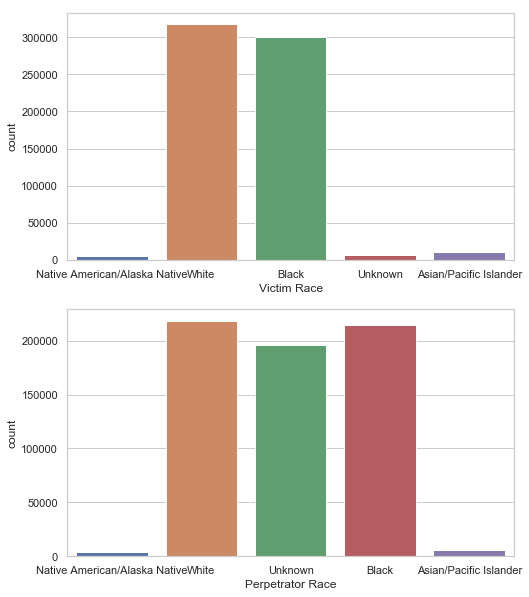

In [122]:
plt.figure(figsize=(8, 10))
plt.subplot(2,1,1)
sns.countplot(x='Victim Race',data=copyDATA)
plt.subplot(2,1,2)
sns.countplot(x='Perpetrator Race',data=copyDATA)

Since a huge part of the data for the perpetrator Race is unknown we can only affirm that the victims are mostly Black or white

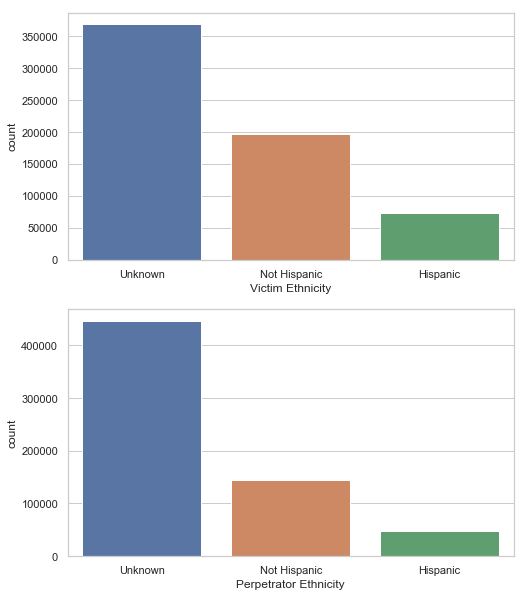

In [123]:
plt.figure(figsize=(8, 10))
plt.subplot(2,1,1)
sns.countplot(x='Victim Ethnicity',data=copyDATA)
plt.subplot(2,1,2)
sns.countplot(x='Perpetrator Ethnicity',data=copyDATA)


We can't conclude anything given that more then 60% of the data is unknown

Text(0.5,1,'Victim Age')

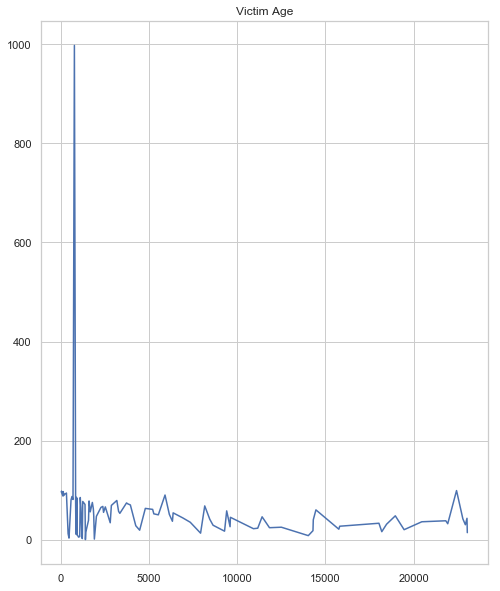

In [124]:
x=copyDATA['Victim Age'].unique()
y=copyDATA['Victim Age'].value_counts()

plt.figure(figsize=(8,10))
plt.plot(y,x)
plt.title('Victim Age')

this figure not only shows that the victim's age is mostly between [20,100]
 but also shows an anomaly in the data age>>200 age==0
 teens represent the highest nbr of crimes

Text(0.5,1,'Perpetrator Age')

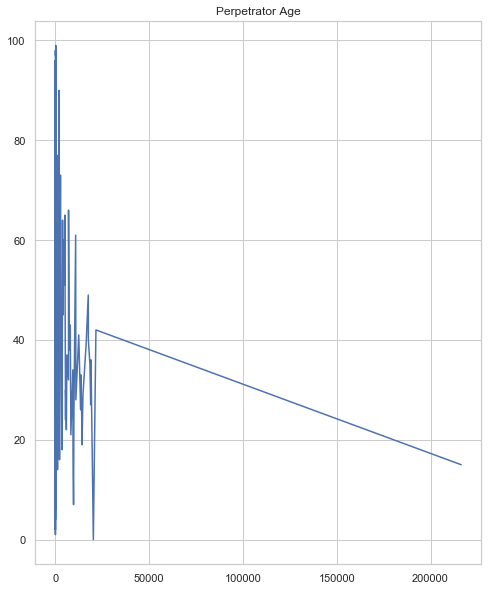

In [125]:
copyDATA = copyDATA.drop(copyDATA[copyDATA['Perpetrator Age']==' '].index)
copyDATA['Perpetrator Age']=copyDATA['Perpetrator Age'].astype(int)
x=copyDATA['Perpetrator Age'].unique()
y=copyDATA['Perpetrator Age'].value_counts()

plt.figure(figsize=(8,10))
plt.plot(y,x)
plt.title('Perpetrator Age')

the perpetrator nbr is deacreasing with the age starting with age=40

their is anomaly in the data age=0 and

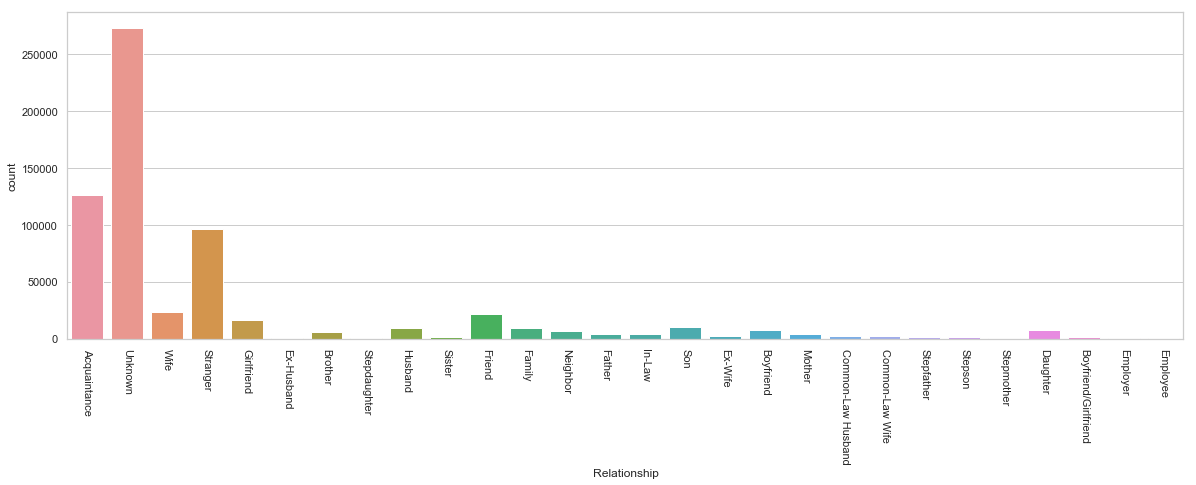

In [126]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=-90)
sns.countplot(x='Relationship',data=copyDATA)


thir is more then 20 types of relationship between the victim and his perpetrator bu lmost all the data is unknown so nothing can be said

this data can be cathegorized in threee or four cathegories

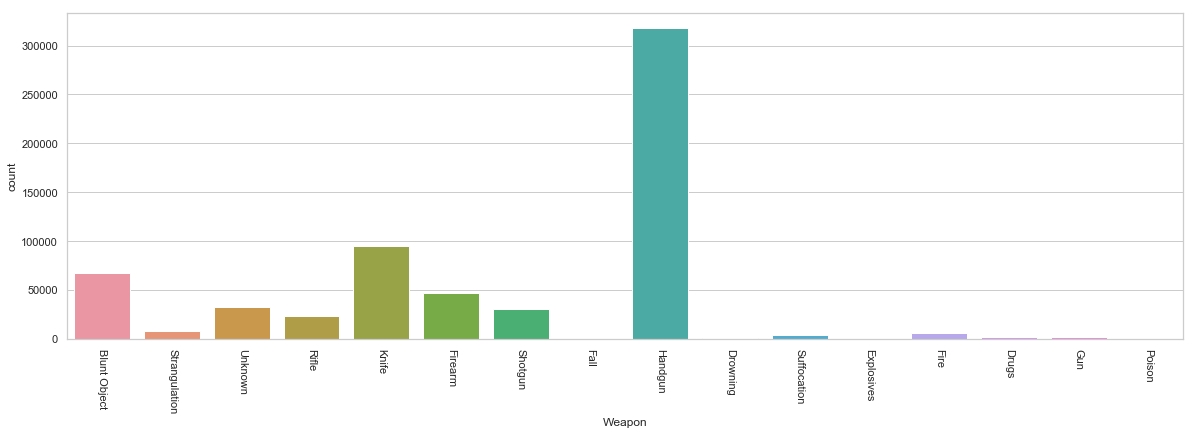

In [127]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=-90)
sns.countplot(x='Weapon',data=copyDATA)

thir is a lot of weapons used but the top five are

handgun knife bluntobject shotgun riffle

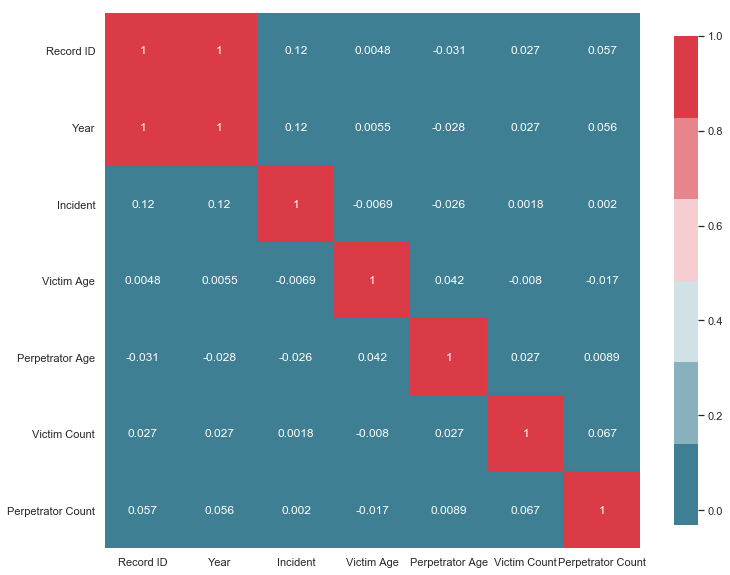

In [128]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = False )
    s = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
        )
   
plot_correlation_map( copyDATA)

thir is a correlation between the incedent and the year

but almost all the data is cathegorical so we can't know much from this matrix

# Cleaning DATA

In [129]:
#creating dummy variables
copyDATA['Crime Solved'] = copyDATA['Crime Solved'].map({'Yes': 1, 'No': 0})

In [130]:
copyDATA['Victim Sex']=copyDATA['Victim Sex'].map({'Male': 0, 'Female': 1,'Unknown':2})
copyDATA['Perpetrator Sex']=copyDATA['Perpetrator Sex'].map({'Male': 0, 'Female': 1,'Unknown':2})
copyDATA['Crime Type'] = copyDATA['Crime Type'].map({'Murder or Manslaughter': 1, 'Manslaughter by Negligence': 0})
copyDATA['Victim Race'] = copyDATA['Victim Race'].map({'Native American/Alaska Native':'Native','Asian/Pacific Islander':'API','White':'white','Black':'Black','Unknown':'Un'})
copyDATA['Perpetrator Race'] = copyDATA['Perpetrator Race'].map({'Native American/Alaska Native':'Native','Asian/Pacific Islander':'API','White':'white','Black':'Black','Unknown':'Un'})
copyDATA['Perpetrator Ethnicity']=copyDATA['Perpetrator Ethnicity'].map({'Unknown': 'Un', 'Not Hispanic': 'NH','Hispanic':'H'})
copyDATA['Victim Ethnicity']=copyDATA['Victim Ethnicity'].map({'Unknown': 'Un', 'Not Hispanic': 'NH','Hispanic':'H'})

In [131]:
relationship_Dictionary = {
                    "Acquaintance":       "Acquaintancer",
                    " Friend": "Acquaintancer",
                    "Neighbor": "Acquaintancer",
                    "Unknown":        "Unknown",
                    "Wife":      "Family",
                    "Ex-Husband":      "Family",
                    "Brother":      "Family",
                    "Stepdaughter":      "Family",
                    "Husband":      "Family",
                    "Sister":      "Family",
                    "Family":      "Family",
                    "Father":      "Family",
                    "In-Law":      "Family",
                    "Son" :      "Family",
                    "Ex-Wife" :      "Family",
                    "Mother" :      "Family",
                    "Common-Law Husband" :      "Family",
                    "Common-Law Wife" :      "Family",
                    
                    "Stepfather":       "Family",
                    "Stepson" :      "Family",
                    "Stepmother" :      "Family",
                    "Daughter":      "Family",
                    "Stranger":   "Stranger",
                    "Girlfriend" :        "Love",
                    "Boyfriend" :        "Love",
                    "Boyfriend/Girlfriend":        "Love",
                    "Employer" :       "Work",
                    "Employee":       "Work",
                                       }

In [132]:
copyDATA[ 'Relationship' ] = copyDATA.Relationship.map( relationship_Dictionary )

In [133]:
data=copyDATA.ix[(copyDATA['Crime Solved'] == 1)].iloc[:,:copyDATA.shape[1]]

c:\users\rihab\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [134]:
data1 = (data.drop(['Record ID', 'Agency Code', 'Agency Name','Record Source','Crime Solved','Month','Agency Type','City','Relationship'], axis=1))
data1 = data1.drop(data1[data1['Victim Sex']==2].index)
data1 = data1.drop(data1[data1['Perpetrator Sex']==2].index)
data1 = data1.drop(data1[data1['Victim Race']=='Un'].index)
#data = data.drop(data[data['Perpetrator Race']=='Un'].index)
#data = (data.drop(['Victim Ethnicity', 'Perpetrator Ethnicity'], axis=1))

In [135]:
data1=data1[data1['Victim Age']<=100]
data1=data1[data1['Victim Age']!=0]

data1=data1[data1['Perpetrator Age']!=0]
data1=data1[data1['Perpetrator Age']<=100]

In [136]:
data_var = pd.get_dummies(data1,columns=['State','Victim Race','Perpetrator Race','Weapon','Victim Ethnicity','Perpetrator Ethnicity'])
data_var.head()

#data_s=data.drop(['Relationship','Weapon'], axis=1)
#data_var = pd.get_dummies(data_s,columns=['State','Victim Race','Victim Ethnicity','Perpetrator Race','Perpetrator Ethnicity'])
#data_var.head()
print(data_var.dtypes.unique())

[dtype('int64') dtype('int32') dtype('uint8')]


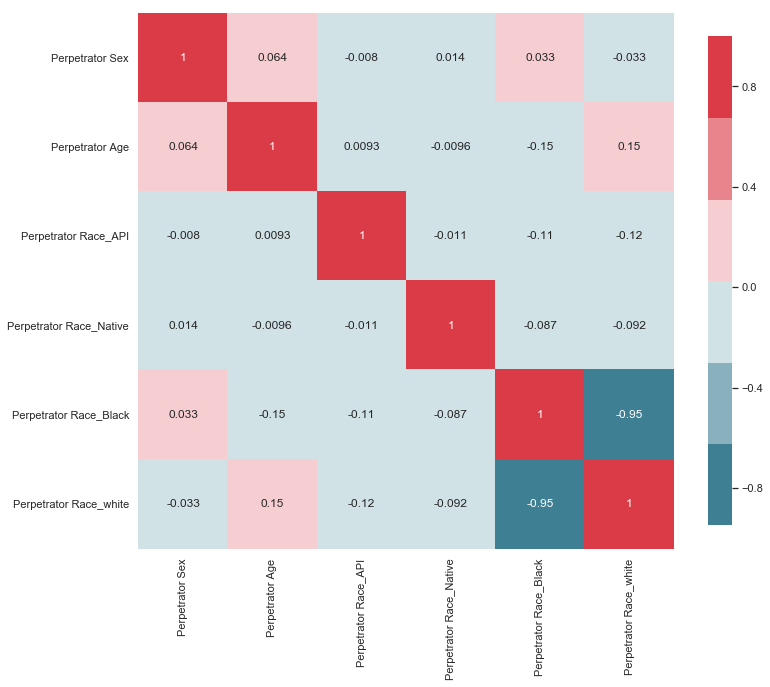

In [137]:
d_cor=data_var.loc[:,['Perpetrator Sex','Perpetrator Age','Perpetrator Race_API','Perpetrator Race_Native','Perpetrator Race_Black','Perpetrator Race_white']]
plot_correlation_map( d_cor)

Sex Prediction

In [138]:
data_var_copy_s=data_var.copy()
data_var_copy_s=data_var_copy_s.drop(['Perpetrator Age','Perpetrator Race_API','Perpetrator Race_Native','Perpetrator Race_Black','Perpetrator Race_white','Crime Type' ], axis=1)


In [139]:
#we will use logistic regression to predict the perpetraotr sex since it's a binary dependant variable 
y=['Perpetrator Sex']
X=[i for i in data_var_copy_s if i not in y]
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,25)
rfe = rfe.fit(data_var_copy_s[X],data_var_copy_s[y])
print(rfe.support_)
print(rfe.ranking_)

c:\users\rihab\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False  True False False False False False False False False False
 False False False False False  True False False False False False False
 False  True  True  True False  True  True False False False False False
  True False  True False False False False False False  True False False
 False False False False False False False False False  True False False
 False  True  True  True  True False False  True  True  True  True False
  True  True  True  True  True False False False False  True False False]
[53 54  1 51  6 19  9 31 20 25  8 34  4 49  2 44 26  1 23 18 43 47 27 30
 33  1  1  1 35  1  1 40 11 28 52 59  1 42  1 48 56 37 41 17  5  1 36 57
 38 32 45 24 39 21 10 16 55  1 50  7  3  1  1  1  1 60 58  1  1  1  1 14
  1  1  1  1  1 15 13 22 12  1 46 29]


In [140]:
rank=rfe.ranking_
my_list=list(data_var_copy_s.columns)
new_list=[]
for i in range(len(rank)):
    if (rank[i]==1):
        new_list.append(my_list[i])


In [141]:
X_s=data_var_copy_s[new_list]
y_s=data_var_copy_s['Perpetrator Sex']

In [142]:
import statsmodels.api as sm
logit_model=sm.Logit(y_s,X_s)
result=logit_model.fit()
#print(result.summary())

Optimization terminated successfully.
         Current function value: 0.383899
         Iterations 7


In [143]:
new_list

['Victim Sex',
 'State_Georgia',
 'State_Louisiana',
 'State_Maine',
 'State_Maryland',
 'State_Michigan',
 'State_Minnesota',
 'State_New Hampshire',
 'State_New Mexico',
 'State_Pennsylvania',
 'State_Wyoming',
 'Victim Race_white',
 'Perpetrator Race_Un',
 'Weapon_Blunt Object',
 'Weapon_Drowning',
 'Weapon_Fall',
 'Weapon_Fire',
 'Weapon_Firearm',
 'Weapon_Gun',
 'Weapon_Knife',
 'Weapon_Poison',
 'Weapon_Rifle',
 'Weapon_Shotgun',
 'Weapon_Strangulation',
 'Victim Ethnicity_Un']

In [144]:
from sklearn.model_selection import train_test_split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_s, y_train_s)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
y_pred_s = logreg.predict(X_test_s)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_s, y_test_s)))

Accuracy of logistic regression classifier on test set: 0.89


In [146]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train_s, y_train_s, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.892


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Q2 consists in creating a linear model for predicting homcides in the upcoming years

In [ ]:
def count_by_city(city):
    city_data=data[data['City']==city]
    c_count=city_data[['Year','Incident']].groupby(['Year'],as_index=False).count()
    l=list(city_data['Year'].value_counts())
    c_count['n_rapport']=l
    return c_count


In [ ]:
c_count=count_by_city('Dallas')

In [ ]:
c_count_training=(c_count.drop(['Incident'], axis=1))

In [ ]:
X_2 = c_count_training#.values[:,np.newaxis] #values[:np.newaxis] puts the values of the columns in np arrays form 2d 
y_2 = c_count['Incident'].values
model = LinearRegression(normalize=True)
model.fit(X_2, y_2)


In [ ]:
model.score(X_2,y_2)

final Output

In [ ]:
print('Accuracy of sex prediction: {:.2f}'.format(logreg.score(X_test_s, y_test_s)),'\n')

print('Acuuracy of the linear model for homicide prediction {:.2f}'.format(model.score(X_2,y_2)),'\n')
